**Import Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

**Load the Dataset**

In [2]:
df=pd.read_csv("Iris.csv")
df.drop(columns=["Id"], inplace=True)

**Encode The species labels into integers**

In [3]:
le= LabelEncoder()
df["Species"] = le.fit_transform(df["Species"])

**Split the features and the targets**

In [4]:
X= df.drop(columns=["Species"])
y= df["Species"]

**Split into Training amd Testing sets**

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

**Make Predictions**

In [6]:
y_pred = rf_classifier.predict(X_test)

# Evaluate the model

accuracy = accuracy_score(y_test, y_pred)
report= classification_report(y_test, y_pred, target_names=le.classes_)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print evaluation results
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)



Accuracy: 1.00
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


**Visualize the Metrics**

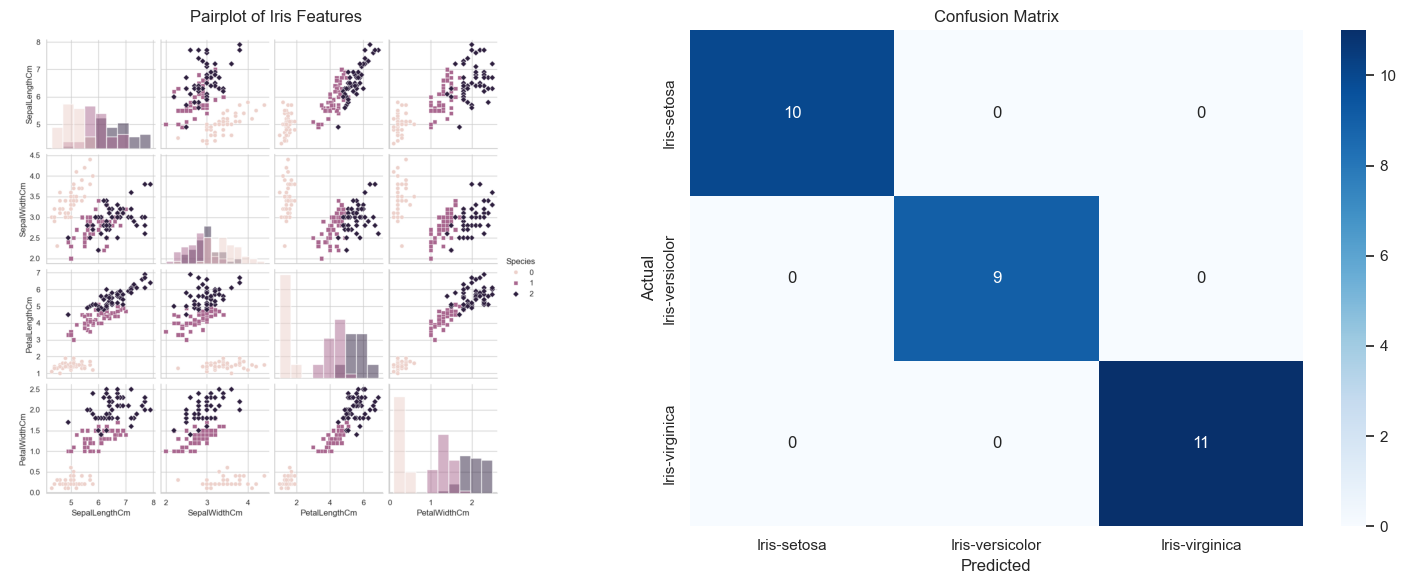

In [8]:
pairplot = sns.pairplot(
    df[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm", "Species"]],
    hue="Species", diag_kind="hist", markers=["o", "s", "D"]
)
pairplot.fig.suptitle("Pairplot of Iris Features", y=1.02)

# Save the pairplot temporarily
pairplot.fig.savefig("pairplot.png")
plt.close(pairplot.fig)

# Now: Plot side-by-side using subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Load and show saved pairplot image
from matplotlib.image import imread
axes[0].imshow(imread("pairplot.png"))
axes[0].axis('off')
axes[0].set_title("Pairplot of Iris Features")

# Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=le.classes_, yticklabels=le.classes_, ax=axes[1])
axes[1].set_title("Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()